In [26]:
import csv
import json
import os
import math
##import processed push data
dir_path = os.getcwd() + '/'
with open(dir_path + 'config.txt', 'rb') as f_conf:
    config = json.load(f_conf)
    f_conf.close() 
result_dir = config["result_dir"]
sample_file = config["sample_file"]
temp_path = config["temp_path"]

with open(temp_path + os.path.splitext(sample_file)[0] + '_userlist.txt', 'rb') as f_temp:
    user_list = json.load(f_temp)
    f_temp.close()

with open(result_dir + os.path.splitext(sample_file)[0] + '_cv.txt', 'rb') as f_result:
    result = csv.reader(f_result)
    user_sim_list = [(i, j, float(sim)) for i,j,sim in list(result)]
    f_result.close()


from IPython.html.widgets import interact
def evaluate(thres_sim):
    ans_pair_lt_thres = 0 #same user & LT
    user_pair_lt_thres = 0 # LT
    num_user = len(user_list)
    
    
    sim_list = zip(*user_sim_list)[2]
    sim_list = [value for value in sim_list if not math.isnan(value)]
    max_thres = max(sim_list)
    print max_thres
    print thres_sim
    if thres_sim > max_thres:
        return
    
    for i,j,sim in user_sim_list:
        if i in j and sim >= thres_sim:
            ans_pair_lt_thres += 1
        if sim >= thres_sim:
            user_pair_lt_thres += 1
        
    #b = len(user_list)
    precision = float(ans_pair_lt_thres) / user_pair_lt_thres
    recall = float(ans_pair_lt_thres) / num_user
    print 'my_precision:', precision , '=', ans_pair_lt_thres, '/', user_pair_lt_thres #how many user their ACC are larger than Thres
    print 'my_recall:', recall , '=', ans_pair_lt_thres, '/', num_user
    if precision == 0 and recall == 0:
        return
    print 'f-1 measure:', 2 * (precision * recall) / (precision + recall)


In [27]:
interact(evaluate, thres_sim=(0.0,1.0,0.01)); #101

1.0
0.49
my_precision: 0.00179730086361 = 395 / 219774
my_recall: 0.550139275766 = 395 / 718
f-1 measure: 0.00358289643162


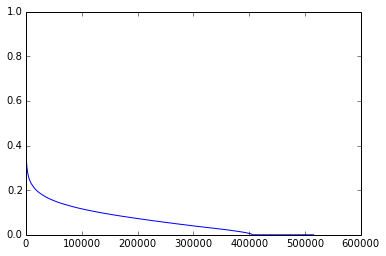

In [33]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
sim = zip(*user_sim_list)[2]
sim = [x for x in sim if not math.isnan(x)]
sorted_sim = sorted(sim, reverse=True)
#print sorted_sim
plt.plot(sorted_sim)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.display import display

def sigmoid_demo(a=5,b=1):
    x = np.linspace(0,10,256)
    s = 1/(1+np.exp(-(x-a)/(b+0.1))) # +0.1 to avoid dividing by 0
    sn = 100.0*(s-min(s))/(max(s)-min(s)) # normalize sigmoid to 0-100
    fig = plt.figure(figsize=(24,6))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.plot(x,sn,lw=2,color='black')
    plt.xlim(x.min(), x.max())

w=widgets.interactive(sigmoid_demo,a=5,b=1)
display(w)

a_slider = widgets.IntSliderWidget(min=-5, max=5, step=1, value=0)
b_slider = widgets.FloatSliderWidget(min=-5, max=5, step=0.3, value=0)
w=widgets.interactive(sigmoid_demo,a=a_slider,b=b_slider)
display(w)